In [1]:
import sys
sys.path.insert(0, 'pipeline')
from mixed_data import create_pipeline

In [2]:
import pandas as pd

data = pd.read_csv("dataset/X_data.csv").drop(columns=["Unnamed: 0"])
labels = pd.read_csv("dataset/y_data.csv").Status

object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].astype('category')

int_columns = data.select_dtypes(include=['int64']).columns
data[int_columns] = data[int_columns].astype('float64')

data.Stage = data.Stage.astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   N_Days         418 non-null    float64 
 1   Drug           312 non-null    category
 2   Age            418 non-null    float64 
 3   Sex            418 non-null    category
 4   Ascites        312 non-null    category
 5   Hepatomegaly   312 non-null    category
 6   Spiders        312 non-null    category
 7   Edema          418 non-null    category
 8   Bilirubin      418 non-null    float64 
 9   Cholesterol    284 non-null    float64 
 10  Albumin        418 non-null    float64 
 11  Copper         310 non-null    float64 
 12  Alk_Phos       312 non-null    float64 
 13  SGOT           312 non-null    float64 
 14  Tryglicerides  282 non-null    float64 
 15  Platelets      407 non-null    float64 
 16  Prothrombin    416 non-null    float64 
 17  Stage          412 non-null    cate

In [3]:
numeric_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                   'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
categorical_features = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Stage"]

In [4]:
param_grid_RandomForest = {
    "preprocessing__num__imputer__n_neighbors": range(3, 10),

    "feature_selector__k": range(1, 19),

    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    "undersampler__k_neighbors": range(3, 10, 2),
    
    "model__estimator__max_depth": range(2, 8),
    "model__estimator__criterion": ["gini", "entropy"],
}

param_grid_KNNeighbor = {
    "preprocessing__num__imputer__n_neighbors": range(3, 10),

    "feature_selector__k": range(1, 19),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    "undersampler__k_neighbors": range(3, 10, 2),
    
    "model__n_neighbors": range(3, 18, 2),
}

param_grid_AdaBoostGNB = {
    "preprocessing__num__imputer__n_neighbors": range(3, 10),

    "feature_selector__k": range(1, 19),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    "undersampler__k_neighbors": range(3, 10, 2),
    
    "model__learning_rate": [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
}

In [5]:
from sklearn.preprocessing import RobustScaler

clf_RandomForest = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        oversampling_strategy={
            "Low chance": False,
            "Transplant needed": True
        },
        undersample_needed=True,
        undersampling_strategy=["High chance"],
        target=labels,
        model="MixedRandomForest"
    )

clf_KNNeighbor = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        oversampling_strategy={
            "Low chance": False,
            "Transplant needed": True
        },
        undersample_needed=True,
        undersampling_strategy=["High chance"],
        target=labels,
        model="MixedKNN"
    )

clf_AdaBoostGNB = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        oversampling_strategy={
            "Low chance": False,
            "Transplant needed": True
        },
        undersample_needed=True,
        undersampling_strategy=["High chance"],
        target=labels,
        model="AdaBoostMixedGaussianNB"
    )

In [6]:
clf_RandomForest

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomKNNImputer(train_labels=0             Low chance
1            High chance
2             Low chance
3             Low chance
4      Transplant needed
             ...        
413           Low chance
414          High chance
415          High chance
416          High chance
417          High chance
Name: Status, Length: 418, dtype: object)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['N_Days', 'Age', 'Bilirubin',
                                                   'C...
                           continuous_features=['N_Days', 'Age', 'Bilirubin',
                                                'Cholesterol', 'Albumin',
                                                'Copper', 'Alk_Phos', 'SGOT',
                                                'Tryglicerides', 'Platelets',
                                                'Prothrombin'],
                           sampling_strategy={'Low chance': False,
                                              'Transplant needed': True})),
                ('undersampler',
                 MixedEditedNearestNeighbors(sampling_strategy=['High '
                                                                'chance'])),
                ('model',
                 BaggingClassifier(estimator=MixedDecisionTree(),
                                   n_estimators=30, n_jobs=-1,
                                   random_state=0))])

In [7]:
clf_KNNeighbor

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomKNNImputer(train_labels=0             Low chance
1            High chance
2             Low chance
3             Low chance
4      Transplant needed
             ...        
413           Low chance
414          High chance
415          High chance
416          High chance
417          High chance
Name: Status, Length: 418, dtype: object)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['N_Days', 'Age', 'Bilirubin',
                                                   'C...
                                                 'Hepatomegaly', 'Spiders',
                                                 'Edema', 'Stage'],
                           continuous_features=['N_Days', 'Age', 'Bilirubin',
                                                'Cholesterol', 'Albumin',
                                                'Copper', 'Alk_Phos', 'SGOT',
                                                'Tryglicerides', 'Platelets',
                                                'Prothrombin'],
                           sampling_strategy={'Low chance': False,
                                              'Transplant needed': True})),
                ('undersampler',
                 MixedEditedNearestNeighbors(sampling_strategy=['High '
                                                                'chance'])),
                ('model', MixedKNN())])

In [8]:
clf_AdaBoostGNB

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomKNNImputer(train_labels=0             Low chance
1            High chance
2             Low chance
3             Low chance
4      Transplant needed
             ...        
413           Low chance
414          High chance
415          High chance
416          High chance
417          High chance
Name: Status, Length: 418, dtype: object)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['N_Days', 'Age', 'Bilirubin',
                                                   'C...
                           continuous_features=['N_Days', 'Age', 'Bilirubin',
                                                'Cholesterol', 'Albumin',
                                                'Copper', 'Alk_Phos', 'SGOT',
                                                'Tryglicerides', 'Platelets',
                                                'Prothrombin'],
                           sampling_strategy={'Low chance': False,
                                              'Transplant needed': True})),
                ('undersampler',
                 MixedEditedNearestNeighbors(sampling_strategy=['High '
                                                                'chance'])),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=MixedGaussianNB(),
                                    random_state=0))])

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
scorer = "f1_macro"

Random Forest best parameters: {'undersampler__k_neighbors': 9, 'preprocessing__num__imputer__n_neighbors': 8, 'oversampler__k_neighbors': 5, 'oversampler__borderline': False, 'model__estimator__max_depth': 5, 'model__estimator__criterion': 'gini', 'feature_selector__k': 12}
                   precision    recall  f1-score   support

      High chance       0.88      1.00      0.94        23
       Low chance       1.00      0.65      0.79        17
Transplant needed       0.40      1.00      0.57         2

         accuracy                           0.86        42
        macro avg       0.76      0.88      0.77        42
     weighted avg       0.91      0.86      0.86        42

                   precision    recall  f1-score   support

      High chance       0.88      0.96      0.92        24
       Low chance       1.00      0.75      0.86        16
Transplant needed       0.50      1.00      0.67         2

         accuracy                           0.88        42
        mac

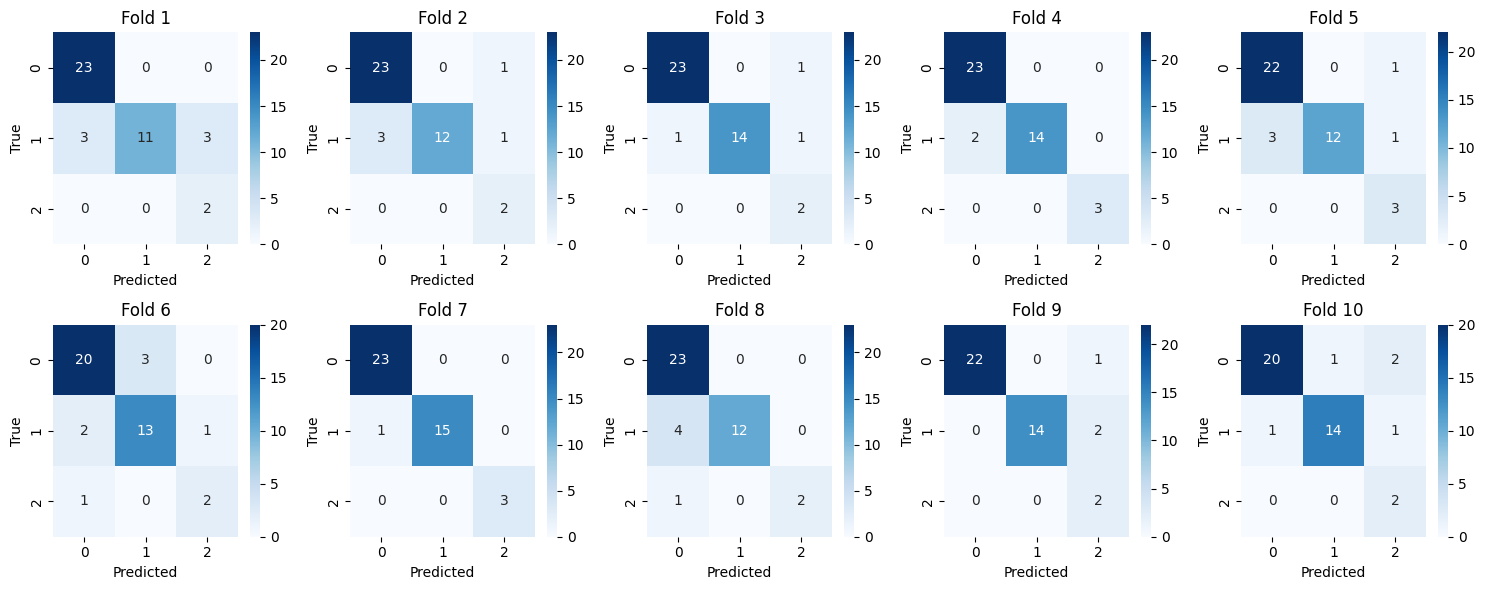

In [11]:
clfrf = RandomizedSearchCV(
    estimator = clf_RandomForest, 
    param_distributions=param_grid_RandomForest,
    cv = skf,
    scoring = scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=10,
)
clfrf.fit(data, labels)

best_params = clfrf.best_params_
print("Random Forest best parameters:", best_params)

f_macro_scores1 = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for fold, (train_index, test_index) in enumerate(skf.split(data, labels)):
    X_fold_train, X_fold_valid = data.iloc[train_index], data.iloc[test_index]
    y_fold_train, y_fold_valid = labels.iloc[train_index], labels.iloc[test_index]

    y_pred = clfrf.predict(X_fold_valid)

    cm = confusion_matrix(y_fold_valid, y_pred)
    report = classification_report(y_fold_valid, y_pred, output_dict=False)
    print(report)
    report = classification_report(y_fold_valid, y_pred, output_dict=True)
    f_macro_scores1.append(report["macro avg"]["f1-score"])

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[fold // 5, fold % 5])
    axes[fold // 5, fold % 5].set_title(f'Fold {fold+1}')
    axes[fold // 5, fold % 5].set_xlabel('Predicted')
    axes[fold // 5, fold % 5].set_ylabel('True')

plt.tight_layout()
plt.show()

KNN best parameters: {'undersampler__k_neighbors': 3, 'preprocessing__num__imputer__n_neighbors': 8, 'oversampler__k_neighbors': 5, 'oversampler__borderline': False, 'model__n_neighbors': 17, 'feature_selector__k': 11}
                   precision    recall  f1-score   support

      High chance       0.90      0.83      0.86        23
       Low chance       1.00      0.59      0.74        17
Transplant needed       0.18      1.00      0.31         2

         accuracy                           0.74        42
        macro avg       0.70      0.80      0.64        42
     weighted avg       0.91      0.74      0.79        42

                   precision    recall  f1-score   support

      High chance       0.80      0.83      0.82        24
       Low chance       0.89      0.50      0.64        16
Transplant needed       0.25      1.00      0.40         2

         accuracy                           0.71        42
        macro avg       0.65      0.78      0.62        42
     weig

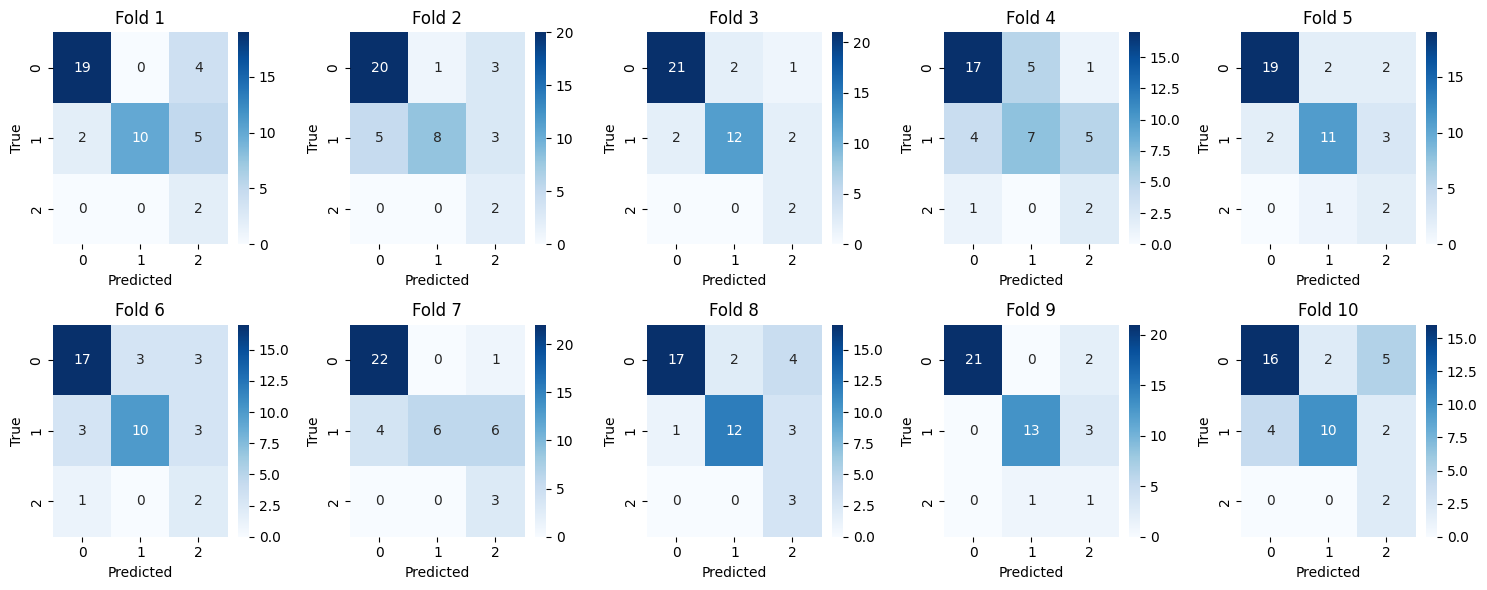

In [12]:
clfknn = RandomizedSearchCV(
    estimator = clf_KNNeighbor, 
    param_distributions=param_grid_KNNeighbor,
    cv = skf,
    scoring = scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=10,
)
clfknn.fit(data, labels)

best_params = clfknn.best_params_
print("KNN best parameters:", best_params)

f_macro_scores2 = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for fold, (train_index, test_index) in enumerate(skf.split(data, labels)):
    X_fold_train, X_fold_valid = data.iloc[train_index], data.iloc[test_index]
    y_fold_train, y_fold_valid = labels.iloc[train_index], labels.iloc[test_index]

    y_pred = clfknn.predict(X_fold_valid)

    cm = confusion_matrix(y_fold_valid, y_pred)
    report = classification_report(y_fold_valid, y_pred, output_dict=False)
    print(report)
    report = classification_report(y_fold_valid, y_pred, output_dict=True)
    f_macro_scores2.append(report["macro avg"]["f1-score"])

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[fold // 5, fold % 5])
    axes[fold // 5, fold % 5].set_title(f'Fold {fold+1}')
    axes[fold // 5, fold % 5].set_xlabel('Predicted')
    axes[fold // 5, fold % 5].set_ylabel('True')

plt.tight_layout()
plt.show()

AdaBoost best parameters: {'undersampler__k_neighbors': 3, 'preprocessing__num__imputer__n_neighbors': 8, 'oversampler__k_neighbors': 5, 'oversampler__borderline': False, 'model__learning_rate': 1.5, 'feature_selector__k': 11}
                   precision    recall  f1-score   support

      High chance       0.86      0.83      0.84        23
       Low chance       0.83      0.59      0.69        17
Transplant needed       0.25      1.00      0.40         2

         accuracy                           0.74        42
        macro avg       0.65      0.80      0.64        42
     weighted avg       0.82      0.74      0.76        42

                   precision    recall  f1-score   support

      High chance       0.69      0.75      0.72        24
       Low chance       0.75      0.56      0.64        16
Transplant needed       0.25      0.50      0.33         2

         accuracy                           0.67        42
        macro avg       0.56      0.60      0.57        42
 

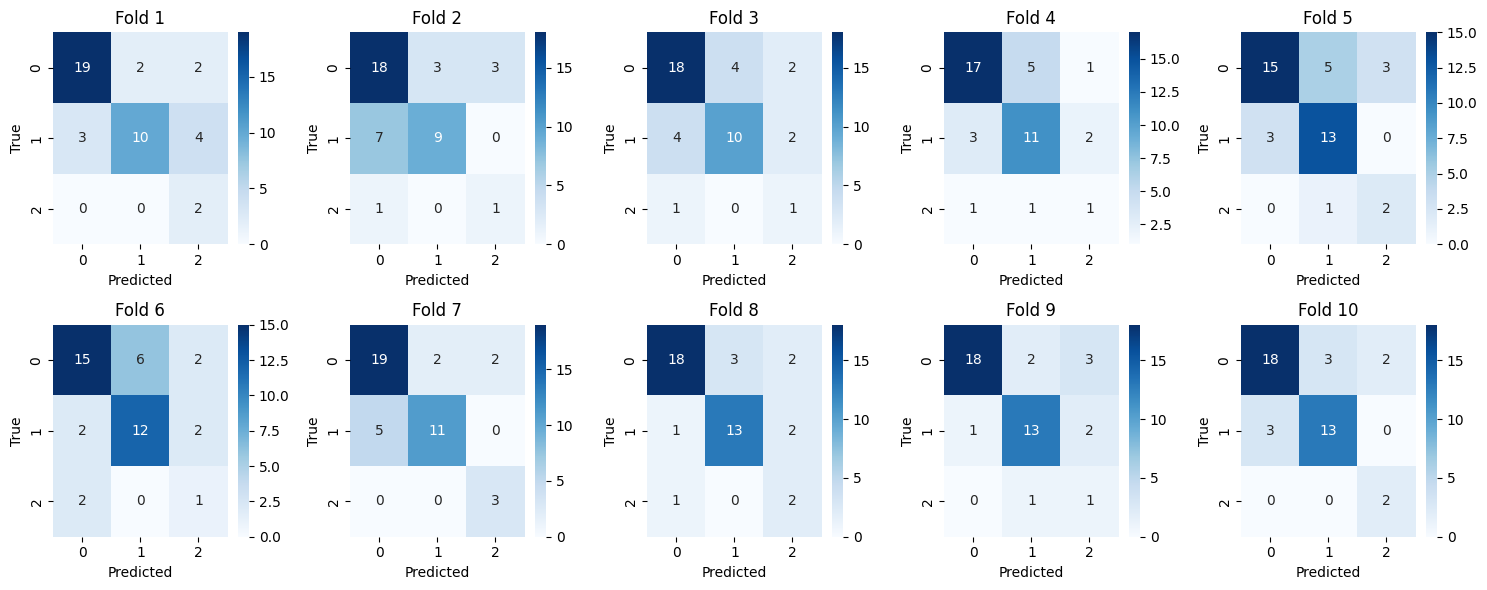

In [13]:
clfadagnb = RandomizedSearchCV(
    estimator = clf_AdaBoostGNB, 
    param_distributions=param_grid_AdaBoostGNB,
    cv = skf,
    scoring = scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=10,
)
clfadagnb.fit(data, labels)

best_params = clfadagnb.best_params_
print("AdaBoost best parameters:", best_params)

f_macro_scores3 = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for fold, (train_index, test_index) in enumerate(skf.split(data, labels)):
    X_fold_train, X_fold_valid = data.iloc[train_index], data.iloc[test_index]
    y_fold_train, y_fold_valid = labels.iloc[train_index], labels.iloc[test_index]

    y_pred = clfadagnb.predict(X_fold_valid)

    cm = confusion_matrix(y_fold_valid, y_pred)
    report = classification_report(y_fold_valid, y_pred, output_dict=False)
    print(report)
    report = classification_report(y_fold_valid, y_pred, output_dict=True)
    f_macro_scores3.append(report["macro avg"]["f1-score"])

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[fold // 5, fold % 5])
    axes[fold // 5, fold % 5].set_title(f'Fold {fold+1}')
    axes[fold // 5, fold % 5].set_xlabel('Predicted')
    axes[fold // 5, fold % 5].set_ylabel('True')

plt.tight_layout()
plt.show()

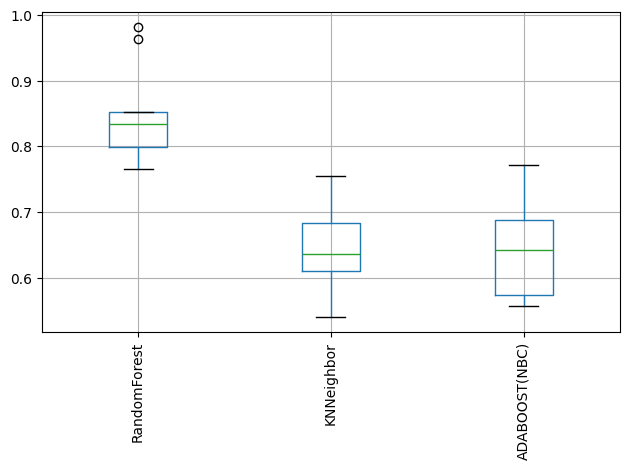

In [14]:
cv_scores = {
    'RandomForest': f_macro_scores1,
    'KNNeighbor': f_macro_scores2,
    'ADABOOST(NBC)': f_macro_scores3
}

df_cv_scores = pd.DataFrame(cv_scores)

df_cv_scores.boxplot()
plt.xticks(ticks=range(1, len(df_cv_scores.columns) + 1), labels=df_cv_scores.columns, rotation=90)
plt.tight_layout()
plt.savefig("cv_scores.png")
plt.show()

c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


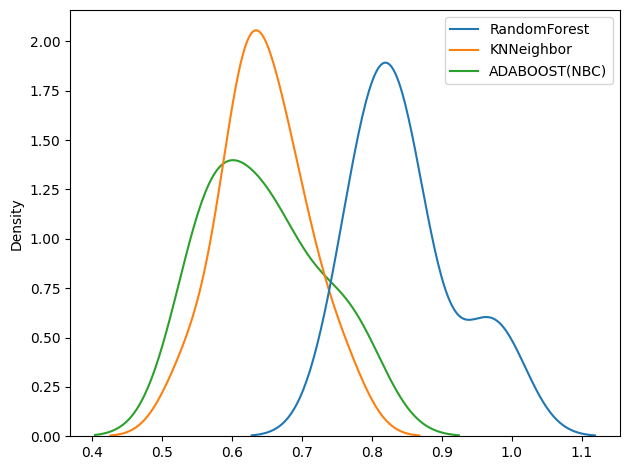

In [15]:
import scipy.stats as stats

sns.kdeplot(data=df_cv_scores)
plt.tight_layout()
plt.show()

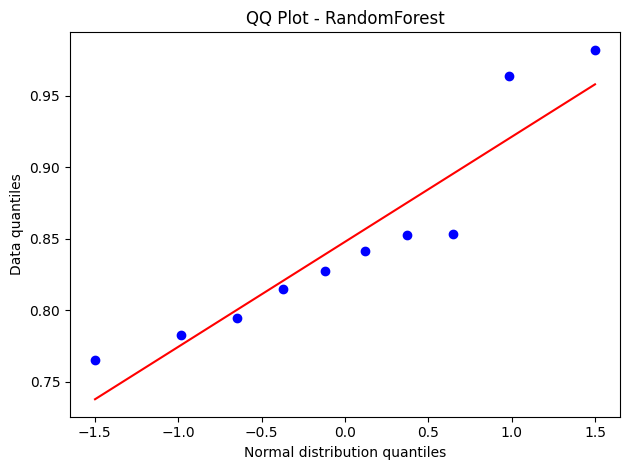

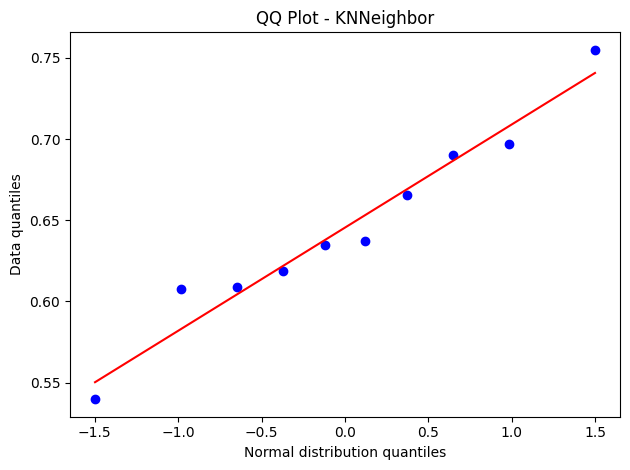

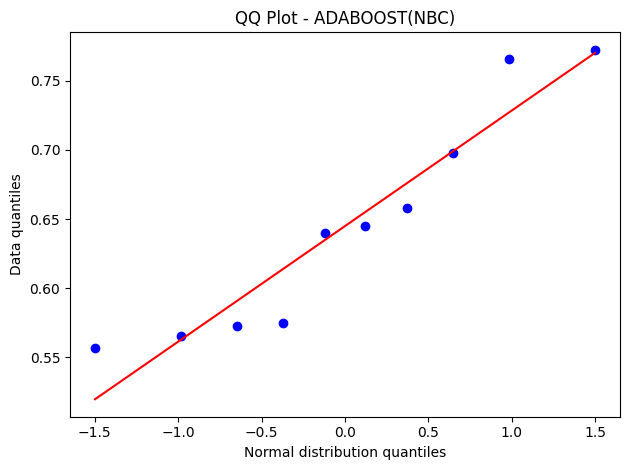

In [16]:
for i, col in enumerate(df_cv_scores.columns):
    stats.probplot(df_cv_scores[col], plot=plt)
    plt.title(f'QQ Plot - {col}')
    plt.xlabel('Normal distribution quantiles')
    plt.ylabel('Data quantiles')
    plt.tight_layout()
    plt.savefig(f"qqplot_{col}.png")

    plt.show()

In [17]:
statistic, p_value = stats.levene(cv_scores["RandomForest"], 
                                 cv_scores["KNNeighbor"], 
                                 cv_scores["ADABOOST(NBC)"])

print("Levene's statistic:", statistic)
print("p value:", p_value)

if p_value < 0.05:
    print("There is evidence to reject the null hypothesis of equal variances.")
else:
    print("There is no evidence to reject the null hypothesis of equal variances.")

Levene's statistic: 0.46629856844442724
p value: 0.6322779360193294
There is no evidence to reject the null hypothesis of equal variances.


In [18]:
from scipy.stats import kruskal
from itertools import combinations
from scipy.stats import wilcoxon

kruskal_result = kruskal(cv_scores["RandomForest"], 
                         cv_scores["KNNeighbor"], 
                         cv_scores["ADABOOST(NBC)"])

print("Kruskal-Wallis statistic:", kruskal_result.statistic)
print("p value:", kruskal_result.pvalue)

if kruskal_result.pvalue < 0.05:
    print("There is a statistically relevant difference between at least two groups.")
    models = ["RandomForest", "KNNeighbor", "ADABOOST(NBC)"]
    couples = list(combinations(models, 2))
    
    for _ in couples:
        m1, m2 = _
        wilcoxon_result = wilcoxon(cv_scores[m1], cv_scores[m2])
        
        print("Comparing", m1, "and", m2)
        print("Wilcoxon statistic:", wilcoxon_result.statistic)
        print("p value:", wilcoxon_result.pvalue)
        
        if wilcoxon_result.pvalue < 0.05:
            print("There is a statistically relevant difference between", m1, "and", m2)
        else:
            print("There is no statistically relevant difference between", m1, "and", m2)
        print("----")
else:
    print("There are no statistically relevant difference between groups.")

Kruskal-Wallis statistic: 18.59870967741935
p value: 9.148323388430848e-05
There is a statistically relevant difference between at least two groups.
Comparing RandomForest and KNNeighbor
Wilcoxon statistic: 0.0
p value: 0.001953125
There is a statistically relevant difference between RandomForest and KNNeighbor
----
Comparing RandomForest and ADABOOST(NBC)
Wilcoxon statistic: 0.0
p value: 0.001953125
There is a statistically relevant difference between RandomForest and ADABOOST(NBC)
----
Comparing KNNeighbor and ADABOOST(NBC)
Wilcoxon statistic: 24.0
p value: 0.76953125
There is no statistically relevant difference between KNNeighbor and ADABOOST(NBC)
----
